In [1]:
import glob
import pandas as pd
import numpy as np
import pickle as pk
import matplotlib.pyplot as plt

rewards_train = {'rl':{}, 'baseline':{}, 'random':{}}
rewards_val = {'rl':{}, 'baseline':{}, 'random':{}}
paths = glob.glob('runs/rewards/*.pk')
for path_ in paths:
    name = 'sim_' + path_.split('rewards_')[-1].split('.pk')[0]
    with open(path_, 'rb') as f:
        rewards_i = pk.load(f)
        for k in ['rl', 'baseline', 'random']:
            rewards_train[k].update({name: rewards_i[k]['train']})
            rewards_val[k].update({name: rewards_i[k]['val']})

rewards_train = {k:pd.DataFrame(v) for k, v in rewards_train.items()}
rewards_val = {k:pd.DataFrame(v) for k, v in rewards_val.items()}

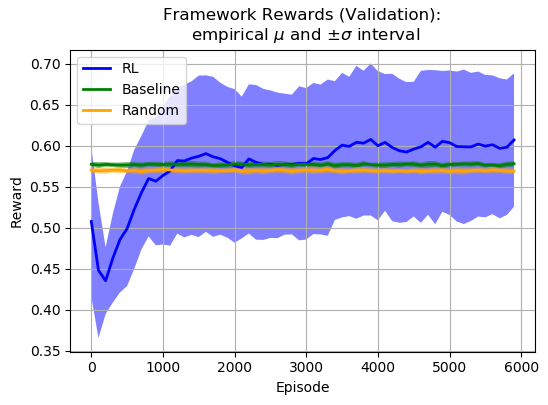

In [2]:
t = np.arange(60)*100
fig, ax = plt.subplots(1, dpi=100)
strats = list(zip(['rl', 'baseline', 'random'], ['blue', 'green', 'orange'], ['RL', 'Baseline', 'Random']))

for strategy, color, label in strats:
    mu = rewards_train[strategy].mean(axis=1)
    sigma = rewards_train[strategy].std(axis=1)
    ax.plot(t, mu, lw=2, label=label, color=color)
    ax.fill_between(t, mu+sigma, mu-sigma, facecolor=color, alpha=0.5)

# for i in range(15,20):
#     ax.plot(t, rewards_train['rl'][f'sim_{i}'].values)
    
ax.set_title('Framework Rewards (Validation):\n empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.grid()
fig.savefig('plots/convergence.png', dpi=200)

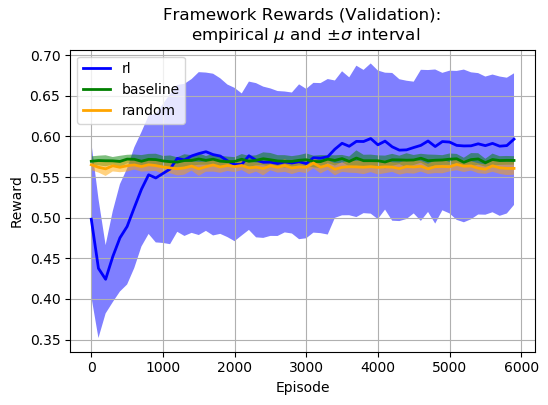

In [3]:
t = np.arange(60)*100
fig, ax = plt.subplots(1, dpi=100)
strats = list(zip(['rl', 'baseline', 'random'], ['blue', 'green', 'orange']))

for strategy, color in strats:
    mu = rewards_val[strategy].mean(axis=1)
    sigma = rewards_val[strategy].std(axis=1)
    ax.plot(t, mu, lw=2, label=strategy, color=color)
    ax.fill_between(t, mu+sigma, mu-sigma, facecolor=color, alpha=0.5)

# for i in range(11,12):
#     ax.plot(t, rewards_train['rl'][f'sim_{i}'].values)
    
ax.set_title('Framework Rewards (Validation):\n empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.grid()
fig.savefig('results.png', dpi=200)

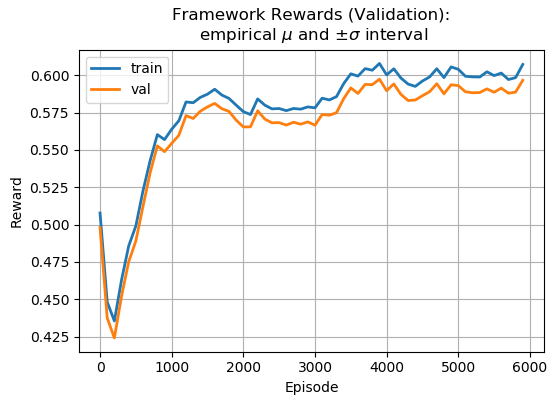

In [4]:
t = np.arange(60)*100
fig, ax = plt.subplots(1, dpi=100)
strats = list(zip(['rl', 'baseline', 'random'], ['blue', 'green', 'orange']))

mu = rewards_train['rl'].mean(axis=1)
ax.plot(t, mu, lw=2, label='train')

mu = rewards_val['rl'].mean(axis=1)
ax.plot(t, mu, lw=2, label='val')
    
ax.set_title('Framework Rewards (Validation):\n empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.grid()
fig.savefig('results.png', dpi=120)

No handles with labels found to put in legend.


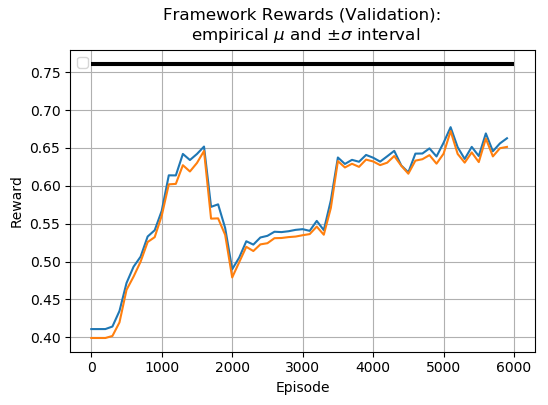

In [5]:
t = np.arange(60)*100
fig, ax = plt.subplots(1, dpi=100)
strats = list(zip(['rl', 'baseline', 'random'], ['blue', 'green', 'orange']))

for i in range(0,1):
    path_ = f'runs/rewards/rewards_{i}.pk'
    with open(path_, 'rb') as f:
        rewards_i = pk.load(f)
    ax.plot(t, rewards_train['rl'][f'sim_{i}'].values)
    ax.plot(t, rewards_val['rl'][f'sim_{i}'].values)
    ax.hlines(y=rewards_i['target']['train'], xmin=0, xmax=6000)
    ax.hlines(y=rewards_i['target']['val'], xmin=0, xmax=6000)
    
ax.set_title('Framework Rewards (Validation):\n empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.grid()
fig.savefig('results.png', dpi=120)

In [6]:
rewards_i['target']['train']

0.7614248866698287

In [7]:
rewards_i['target']

{'train': 0.7614248866698287, 'val': 0.7598680433208965}

In [8]:
rewards_train['rl'][f'sim_8']

0     0.605341
1     0.410911
2     0.410911
3     0.441867
4     0.487376
5     0.520594
6     0.579771
7     0.645945
8     0.654433
9     0.674907
10    0.672563
11    0.660372
12    0.665443
13    0.669951
14    0.677145
15    0.672181
16    0.682179
17    0.672893
18    0.678272
19    0.671382
20    0.682823
21    0.682210
22    0.665656
23    0.682592
24    0.678814
25    0.671455
26    0.678989
27    0.679264
28    0.677347
29    0.672642
30    0.668999
31    0.674637
32    0.651712
33    0.667697
34    0.642429
35    0.673623
36    0.683890
37    0.682998
38    0.683888
39    0.682925
40    0.683442
41    0.678074
42    0.684197
43    0.683740
44    0.685183
45    0.658019
46    0.679608
47    0.665332
48    0.635229
49    0.665759
50    0.684211
51    0.630189
52    0.646353
53    0.663731
54    0.657959
55    0.643831
56    0.624143
57    0.606532
58    0.624494
59    0.629963
Name: sim_8, dtype: float64